# Setup

In [53]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from econml.dml import CausalForestDML

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
data = pd.read_csv('./GL-SMART-knn/pre-processed-data-normalized/pp_data_preop_6month.csv')

In [56]:
len(data)

369

In [3]:
data.head()

,PID,Race_White,Race_Black,Race_Other,Race_Hispanic,Race_Asian,Gender,Age,Comorbidity,Lateral Radiographs\Lateral C7 to Sacrum@Pre-OP,...,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T5,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T6,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T7,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T8,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T9,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_C7,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T1,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T2,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T3,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T4
0,GRNDRUY0001,-1.670172,-0.502169,-0.137361,5.916080,-0.128338,0.509387,-0.468418,1.721425,0.822326,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,GRNDRUY0002,0.598741,-0.502169,-0.137361,-0.169031,-0.128338,0.509387,0.487986,1.721425,-0.949772,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,GRNDRUY0004,0.598741,-0.502169,-0.137361,-0.169031,-0.128338,0.509387,-0.468418,-0.580914,1.030808,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,GRNDRUY0005,-1.670172,1.991361,-0.137361,-0.169031,-0.128338,0.509387,0.487986,1.721425,-0.810784,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,GRNDRUY0013,0.598741,-0.502169,-0.137361,-0.169031,-0.128338,-1.963144,0.966188,-0.580914,1.378279,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df = pd.read_csv('./GL-SMART-knn/pre-processed-data-normalized/pp_data_preop_6month.csv')

In [19]:
# splitting dataframe in a particular size
control_group, treatment_group = train_test_split(data, test_size=0.5, random_state=200)

In [12]:
# y0 = control_group[['PID','SRS-22\\21. (SRS)@Pre-OP']]
# y1 = treatment_group[['PID','SRS-22\\21. (SRS)@6-month-PO']]

# y0 = y0.dropna(subset=['SRS-22\\21. (SRS)@Pre-OP'])
# y1 = y1.dropna(subset=['SRS-22\\21. (SRS)@6-month-PO'])

In [22]:
control_group.head()

,PID,Race_White,Race_Black,Race_Other,Race_Hispanic,Race_Asian,Gender,Age,Comorbidity,Lateral Radiographs\Lateral C7 to Sacrum@Pre-OP,...,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T5,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T6,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T7,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T8,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T9,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_C7,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T1,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T2,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T3,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T4
102,GRNDRUY0218,-1.670172,-0.502169,7.280110,-0.169031,-0.128338,0.509387,0.009784,1.721425,1.284462,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30,GRNDRUY0082,-1.670172,1.991361,-0.137361,-0.169031,-0.128338,0.509387,-0.468418,-0.580914,0.478331,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
194,GRNDRUY0399,0.598741,-0.502169,-0.137361,-0.169031,-0.128338,0.509387,0.966188,-0.580914,0.033569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,GRNDRUY0469,-1.670172,1.991361,-0.137361,-0.169031,-0.128338,0.509387,-0.468418,-0.580914,-1.331989,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
262,GRNDRUY0513,0.598741,-0.502169,-0.137361,-0.169031,-0.128338,0.509387,0.487986,-0.580914,-1.714207,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
treatment_group.head()

,PID,Race_White,Race_Black,Race_Other,Race_Hispanic,Race_Asian,Gender,Age,Comorbidity,Lateral Radiographs\Lateral C7 to Sacrum@Pre-OP,...,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T5,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T6,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T7,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T8,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Lower:@6-month-PO_T9,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_C7,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T1,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T2,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T3,Posterior/Anterior Radiographs\Upper Thoracic Levels Measured Upper:@6-month-PO_T4
120,GRNDRUY0253,-1.670172,-0.502169,-0.137361,5.916080,-0.128338,0.509387,0.966188,-0.580914,-0.331970,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
349,GRNDRUY0924,0.598741,-0.502169,-0.137361,-0.169031,-0.128338,0.509387,-0.468418,-0.580914,-2.131171,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
343,GRNDRUY0912,0.598741,-0.502169,-0.137361,-0.169031,-0.128338,0.509387,-2.859426,-0.580914,-0.428567,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
172,GRNDRUY0348,-1.670172,-0.502169,-0.137361,-0.169031,7.791937,0.509387,0.009784,-0.580914,0.940466,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
320,GRNDRUY0810,0.598741,-0.502169,-0.137361,-0.169031,-0.128338,0.509387,-0.468418,1.721425,0.110012,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
# Sufficient adjustment sets ???
features_to_keep = []

for col in data.columns:
    if 'T5 - T12' in col:
        features_to_keep.append(col)
    elif 'coronal C7 to CSVL' in col:
        features_to_keep.append(col)
    # elif 'EIV' in col:
    #     features_to_keep.append(col)
    elif 'Lumbar Curve' in col:
        features_to_keep.append(col)
    elif 'Apical Translation' in col:
        features_to_keep.append(col)
    elif 'Thoracic Curve' in col:
        features_to_keep.append(col)

In [32]:
control_features = []
treatment_features = []

for item in features_to_keep:
    if 'Pre-OP' in item:
        control_features.append(item)
    else:
        treatment_features.append(item)

In [33]:
control_features

['Lateral Radiographs\\T5 - T12@Pre-OP',
 'Posterior/Anterior Radiographs\\Lumbar Curve Direction:@Pre-OP',
 'Posterior/Anterior Radiographs\\Lumbar Curve:@Pre-OP',
 'Posterior/Anterior Radiographs\\ThL-Lumbar Apical Translation@Pre-OP',
 'Posterior/Anterior Radiographs\\Thoracic Apical Translation to CSVL@Pre-OP',
 'Posterior/Anterior Radiographs\\Thoracic Curve Direction:@Pre-OP',
 'Posterior/Anterior Radiographs\\Thoracic Curve:@Pre-OP',
 'Posterior/Anterior Radiographs\\Upper Thoracic Curve Direction:@Pre-OP',
 'Posterior/Anterior Radiographs\\Upper Thoracic Curve:@Pre-OP']

In [34]:
treatment_features

['Lateral Radiographs\\T5 - T12@6-month-PO',
 'Posterior/Anterior Radiographs\\Lumbar Curve Direction:@6-month-PO',
 'Posterior/Anterior Radiographs\\Lumbar Curve:@6-month-PO',
 'Posterior/Anterior Radiographs\\ThL-Lumbar Apical Translation@6-month-PO',
 'Posterior/Anterior Radiographs\\Thoracic Apical Translation to CSVL@6-month-PO',
 'Posterior/Anterior Radiographs\\Thoracic Curve Direction:@6-month-PO',
 'Posterior/Anterior Radiographs\\Thoracic Curve:@6-month-PO',
 'Posterior/Anterior Radiographs\\Upper Thoracic Curve Direction:@6-month-PO',
 'Posterior/Anterior Radiographs\\Upper Thoracic Curve:@6-month-PO']

In [35]:
len(control_features) == len(treatment_features)

True

In [37]:
X_0 = control_group[control_features].to_numpy()
y_0 = control_group['SRS-22\\21. (SRS)@Pre-OP'].to_numpy().ravel()
X_1 = treatment_group[treatment_features].to_numpy()
y_1 = treatment_group['SRS-22\\21. (SRS)@6-month-PO'].to_numpy().ravel()

In [39]:
model_0 = HistGradientBoostingRegressor()
model_1 = HistGradientBoostingRegressor()

model_0.fit(X_0, y_0)
model_1.fit(X_1, y_1)

HistGradientBoostingRegressor()

In [42]:

data_without_treatment = data[control_features].to_numpy()
treatment_effects = model_1.predict(data_without_treatment) - model_0.predict(data_without_treatment)

In [43]:
treatment_effects

array([ 1.01162137,  0.58353385,  0.31509078,  1.53091702,  1.12471837,
        0.85017889,  0.87502982,  1.48555978,  0.58510294,  0.65176386,
        0.84565796,  0.48574432,  0.70506813,  0.86023061,  0.81870012,
        1.00607181,  0.62299084,  0.3298016 ,  0.6146234 ,  0.54340008,
        0.61460406,  0.97667346,  0.27377695,  0.97015802,  0.74523672,
        0.66184034,  1.03201687,  0.92556798,  0.61068962,  0.73901881,
        0.00910728,  0.37138534,  0.57764397,  1.04202889,  1.24480212,
        1.16219085,  0.79395855,  0.61045911,  0.28920479,  0.82196117,
        0.73962605,  0.3808542 ,  0.5758165 ,  0.77470579,  0.45116443,
        0.48992088,  0.77960802,  0.64059177,  0.21453737,  0.72180951,
        0.64347137,  0.94272051,  0.70913381,  0.87888916,  0.70783726,
        0.78291301,  0.65603581,  0.78366204,  0.7415441 ,  0.72154692,
        0.69005445,  0.69845461,  1.02552149,  0.96788018,  0.99109561,
        0.80289445,  0.91933749,  0.55185214,  0.62016601,  0.89

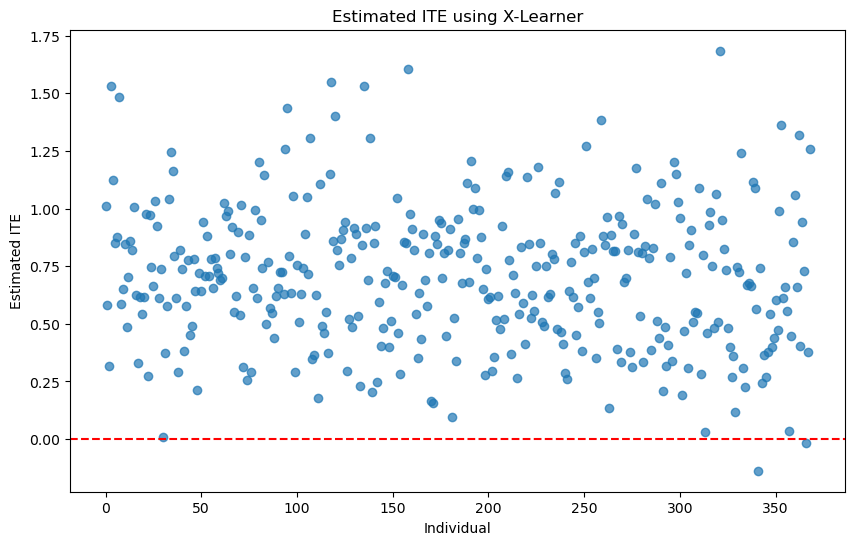

In [50]:
# Plot estimated ITE
plt.figure(figsize=(10, 6))
plt.scatter(range(len(treatment_effects)), treatment_effects, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Estimated ITE using X-Learner")
plt.xlabel("Individual")
plt.ylabel("Estimated ITE")
plt.show()

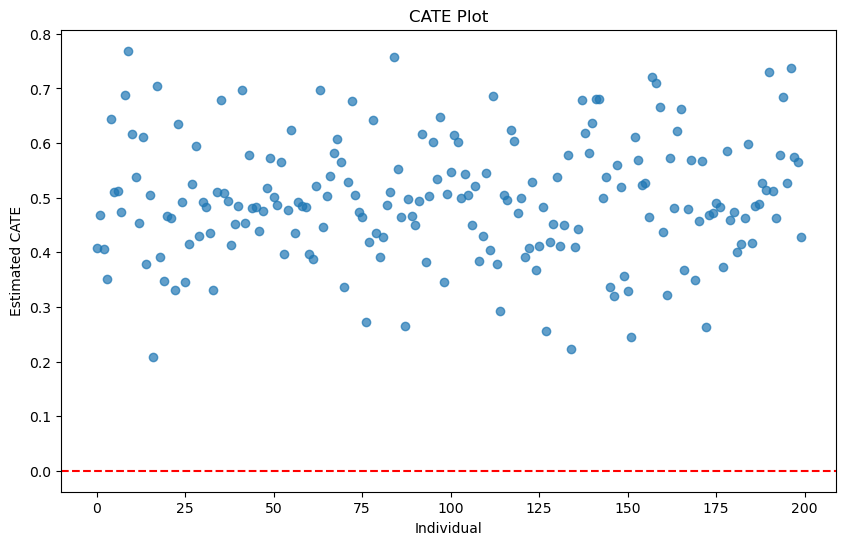

In [55]:
# Generate synthetic data
np.random.seed(0)
n = 1000
X = np.random.normal(0, 1, size=(n, 5))
T = np.random.binomial(1, 0.5, size=(n,))
Y = X[:, 0] + 0.5 * T + np.random.normal(0, 1, size=(n,))

# Split data
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.2)

# Train Causal Forest
model = CausalForestDML()
model.fit(Y_train, T_train, X=X_train)

# Predict CATE
cate = model.effect(X_test)

# Plot CATE
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cate)), cate, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("CATE Plot")
plt.xlabel("Individual")
plt.ylabel("Estimated CATE")
plt.show()
